# Naive Bayes for classification

In the following we apply the Naive Bayes method for classification to a data set with success/failure categories per data point. This method is based on Bayes' theorem for conditional probabilities incorporating the assumptions that different attributes can be described by means of (simple) distributions and that these are independent from one and another (this stands for the naive in the name of the method). This method is a simple and fast one which can deal with data sets consisting of many columns (representing the attributes). For a deeper discussion of this matter, we refer to https://en.wikipedia.org/wiki/Naive_Bayes_classifier, https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c and https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/.

In [19]:
#import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

In [20]:
#defining the data frame
df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [21]:
#define variables
X = df[["age","interest"]].values

Y = df["success"].values # single brackets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#train model using GaussianNB
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

0.8933333333333333


In [24]:
#?GaussianNB

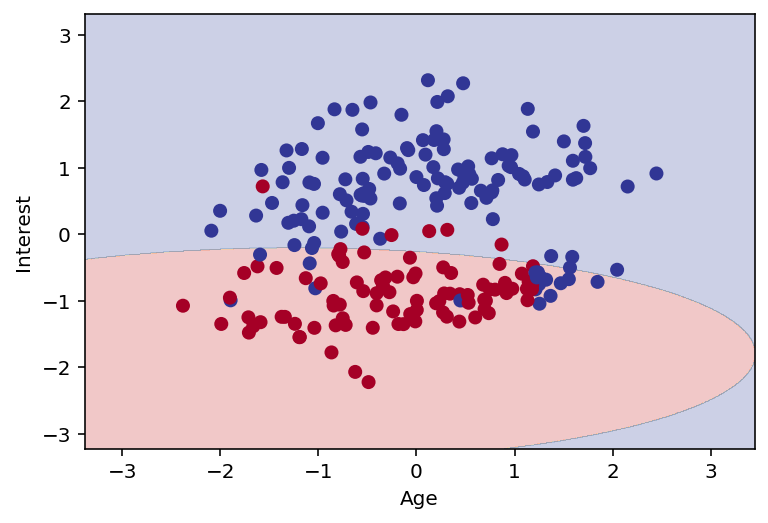

In [25]:
#plotting results for training data
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

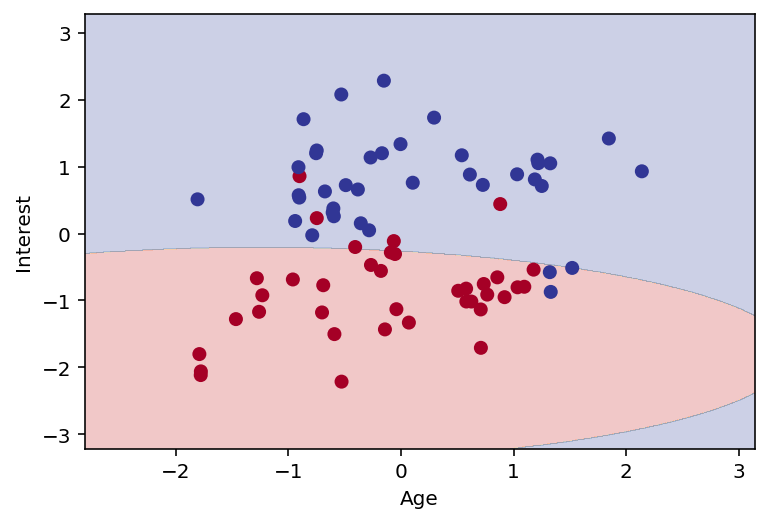

In [28]:
#plotting results for test data
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

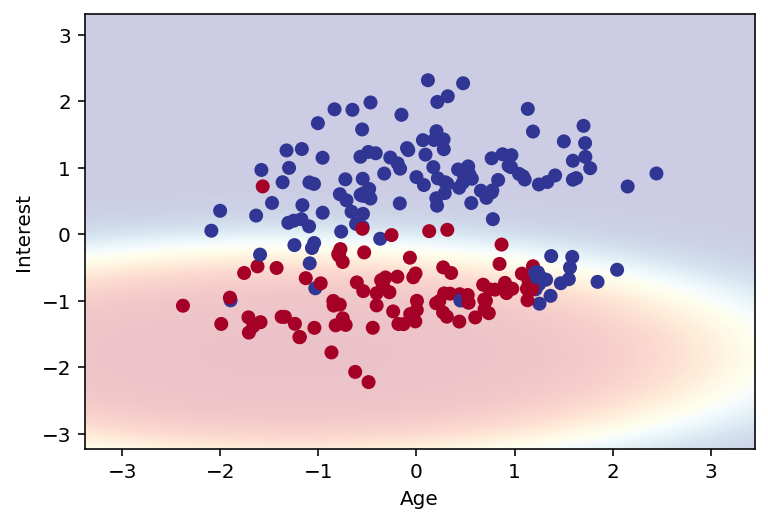

In [29]:
#plotting results when transition regions are considered
plot_classifier(model, X_train, Y_train, proba = True, xlabel = "Age", ylabel = "Interest")

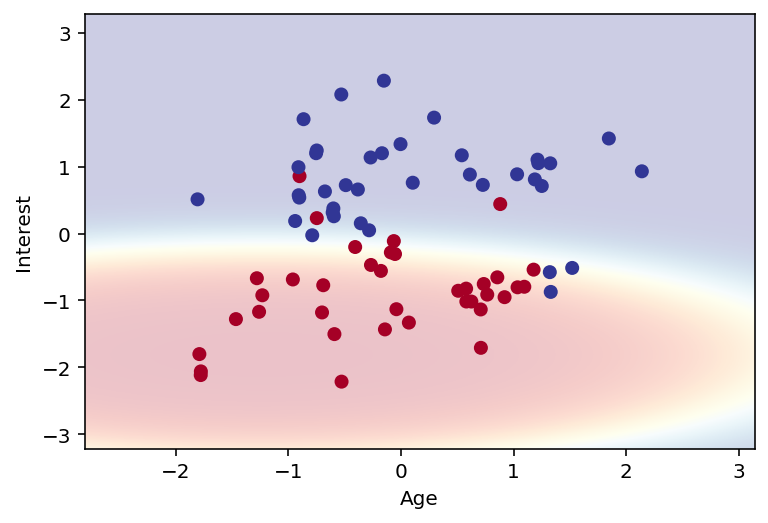

In [30]:
plot_classifier(model, X_test, Y_test, proba = True, xlabel = "Age", ylabel = "Interest")

In [31]:
#when assuming that the attributes follow a Bernoulli distribution (potentially not justified)
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

0.9066666666666666


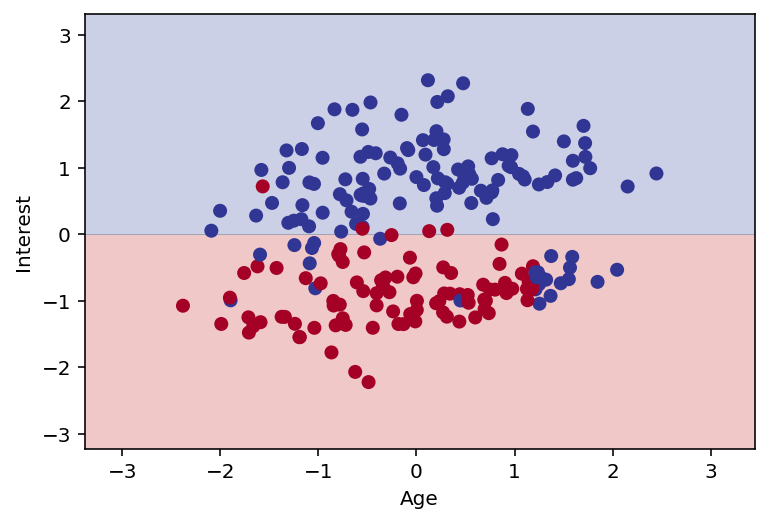

In [32]:
#plotting results for training data
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

We notice that the result looks fairly different as compared to the GaussianNB case.

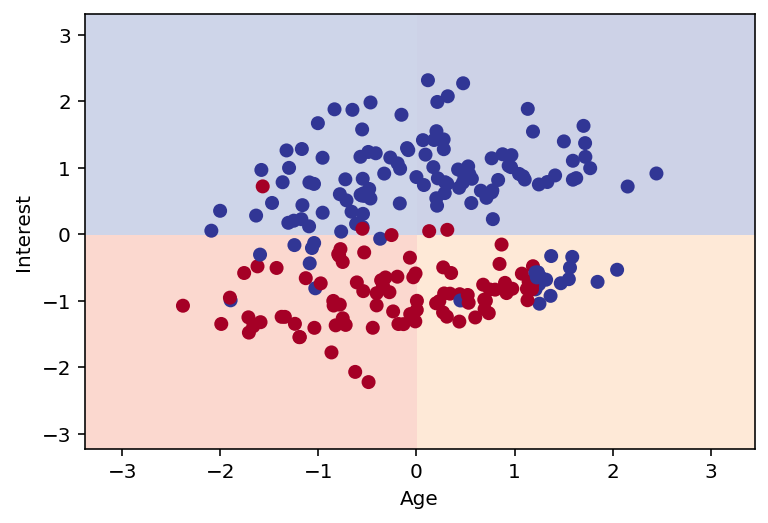

In [33]:
#plotting results when transition regions are considered
plot_classifier(model, X_train, Y_train, proba = True, xlabel = "Age", ylabel = "Interest")

These results may indicate that assuming the Gaussian distribution for the attributes is a good hypothesis.